<a href="https://colab.research.google.com/github/07anishu12/Sperm-Quality/blob/main/sperm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import Sequence
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Step 2: Unzip the uploaded folder
import zipfile
import os

# Replace 'folder.zip' with the name of your uploaded zipped file
zip_file_name = 'sperm qulaity.zip'

# Unzip the folder
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall('extracted_folder')  # Specify a directory for extraction

# List the files in the extracted folder
print(os.listdir('extracted_folder'))

['sperm qulaity']


In [3]:
bad_sperm = r"/content/extracted_folder/sperm qulaity/data/external/Bad Sperm"
good_sperm = r"/content/extracted_folder/sperm qulaity/data/external/Good Sperm"


In [4]:
# Count the number of files in each directory
bad_sperm_count = len(os.listdir(bad_sperm))
good_sperm_count = len(os.listdir(good_sperm))


In [5]:
# Create the DataFrame
data = pd.DataFrame({
    'Category': ['Bad Sperm', 'Good Sperm'],
    'Count': [bad_sperm_count, good_sperm_count]
})

print(data)

     Category  Count
0   Bad Sperm   3656
1  Good Sperm    486


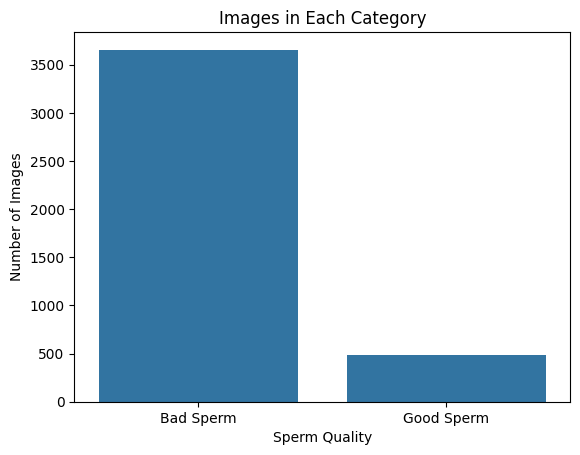

In [6]:

# Plotting the data
sns.barplot(x="Category", y="Count", data=data)
plt.title('Images in Each Category')
plt.xlabel("Sperm Quality")
plt.ylabel("Number of Images")
plt.show()



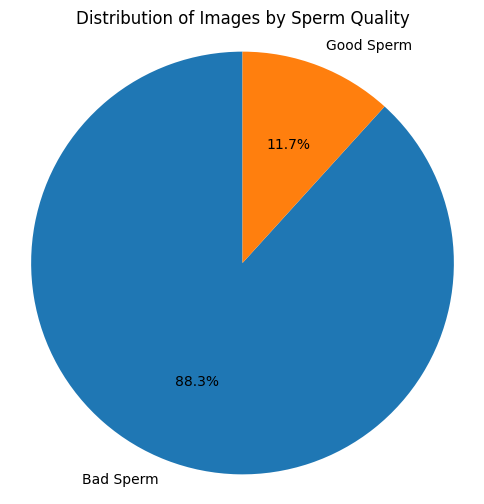

In [7]:
# Data distribution
plt.figure(figsize=(6, 6))
plt.pie(data['Count'], labels=data['Category'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Images by Sperm Quality')
plt.axis('equal')
plt.show()

In [8]:
# Display images from folder
def display_images_from_folder(folder_path, num_images=5, title=""):
    image_files = os.listdir(folder_path)[:num_images]
    plt.figure(figsize=(15, 5))
    plt.suptitle(title, fontsize=16)
    for i, img_file in enumerate(image_files):
        img_path = os.path.join(folder_path, img_file)
        img = Image.open(img_path)
        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i + 1}")
    plt.show()


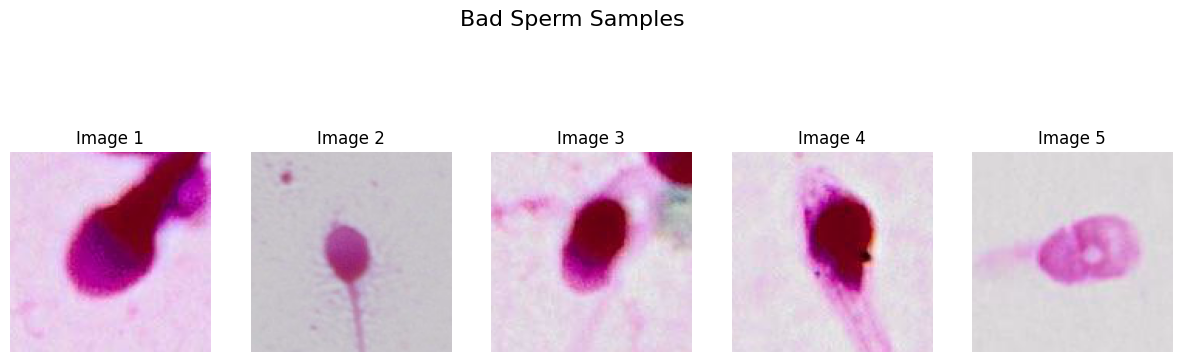

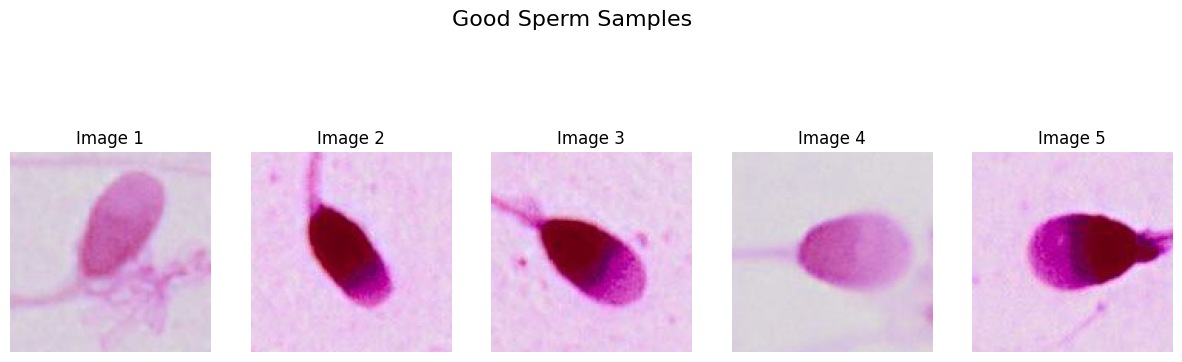

In [9]:
# Display images for each category
display_images_from_folder(bad_sperm, num_images=5, title="Bad Sperm Samples")
display_images_from_folder(good_sperm, num_images=5, title="Good Sperm Samples")


In [10]:
bad_sperm_images = [os.path.join(bad_sperm, img) for img in
os.listdir(bad_sperm)]
good_sperm_images = [os.path.join(good_sperm, img) for img in
os.listdir(good_sperm)]
bad_sperm_df = pd.DataFrame({
 'file_path': bad_sperm_images,
 'label': 'bad_sperm'
})
good_sperm_df = pd.DataFrame({
 'file_path': good_sperm_images,
 'label': 'good_sperm'
})
combined_df = pd.concat([bad_sperm_df, good_sperm_df],
ignore_index=True)
combined_df

,file_path,label
0,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
1,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
2,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
3,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
4,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
...,...,...
4137,/content/extracted_folder/sperm qulaity/data/e...,good_sperm
4138,/content/extracted_folder/sperm qulaity/data/e...,good_sperm
4139,/content/extracted_folder/sperm qulaity/data/e...,good_sperm
4140,/content/extracted_folder/sperm qulaity/data/e...,good_sperm


In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
pip install imblearn

In [13]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(combined_df[['file_path']], combined_df['label'])
balanced_train_df = pd.DataFrame({
 'filepaths': X_resampled['file_path'],
 'labels': y_resampled
})


In [14]:
balanced_train_df


,filepaths,labels
0,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
1,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
2,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
3,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
4,/content/extracted_folder/sperm qulaity/data/e...,bad_sperm
...,...,...
7307,/content/extracted_folder/sperm qulaity/data/e...,good_sperm
7308,/content/extracted_folder/sperm qulaity/data/e...,good_sperm
7309,/content/extracted_folder/sperm qulaity/data/e...,good_sperm
7310,/content/extracted_folder/sperm qulaity/data/e...,good_sperm


In [15]:
train_df, temp_df = train_test_split(balanced_train_df, test_size=0.2,
stratify=balanced_train_df['labels'], random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5,
stratify=temp_df['labels'], random_state=42)


In [16]:
print(f"Training set size: {len(train_df)}")
print(f"Validation set size: {len(val_df)}")
print(f"Test set size: {len(test_df)}")

Training set size: 5849
Validation set size: 731
Test set size: 732


In [17]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

In [18]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)


In [19]:
val_test_datagen = ImageDataGenerator(rescale=1.0/255.0)


In [20]:
train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='filepaths',
    y_col='labels',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 5849 validated image filenames belonging to 2 classes.


In [21]:
validation_generator = val_test_datagen.flow_from_dataframe(
    val_df,
    x_col='filepaths',
    y_col='labels',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)


Found 731 validated image filenames belonging to 2 classes.


In [22]:
test_generator = val_test_datagen.flow_from_dataframe(
    test_df,
    x_col='filepaths',
    y_col='labels',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)


Found 732 validated image filenames belonging to 2 classes.


In [23]:
print("Class indices (0: bad_sperm, 1: good_sperm):",
train_generator.class_indices)


Class indices (0: bad_sperm, 1: good_sperm): {'bad_sperm': 0, 'good_sperm': 1}


In [24]:
import numpy as np
import cv2
from tensorflow.keras.utils import Sequence

class DataGenerator(Sequence):
    def __init__(self, dataframe, batch_size=32, image_size=(224, 224), shuffle=True, **kwargs):
        super().__init__(**kwargs)  # Call the parent class constructor
        self.dataframe = dataframe
        self.batch_size = batch_size
        self.image_size = image_size
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        return int(np.floor(len(self.dataframe) / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_data = self.dataframe.iloc[indexes]
        return self.__data_generation(batch_data)

    def on_epoch_end(self):
        self.indexes = np.arange(len(self.dataframe))
        if self.shuffle:
            np.random.shuffle(self.indexes)

    def __data_generation(self, batch_data):
        X = np.empty((self.batch_size, *self.image_size, 3))
        y = np.empty((self.batch_size, *self.image_size, 1))
        for i, row in enumerate(batch_data.itertuples()):
            image = cv2.imread(row.filepaths)
            image = cv2.resize(image, self.image_size)
            X[i] = image / 255.0  # Normalize the image

            # Convert label to binary format
            label = 1 if row.labels == 'Good Sperm' else 0
            y[i] = np.full((self.image_size[0], self.image_size[1], 1), label)  # Fill with label value

        return X, y

In [25]:
# Constants for image size and batch size
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Initialize the training and validation data generators
train_generator = DataGenerator(train_df, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)
validation_generator = DataGenerator(val_df, batch_size=BATCH_SIZE, image_size=IMAGE_SIZE)


In [27]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_unet(input_size=(224, 224, 3)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c4)
    p4 = layers.MaxPooling2D((2, 2))(c4)

    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(p4)
    c5 = layers.Conv2D(1024, (3, 3), activation='relu', padding='same')(c5)

    # Decoder
    u6 = layers.Conv2DTranspose(512, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(512, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c7)

    u8 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u8)
    c8 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c8)

    u9 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1])
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u9)
    c9 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c9)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = models.Model(inputs=[inputs], outputs=[outputs])
    return model

input_shape = (224, 224, 3)
unet = build_unet(input_shape)
unet.compile(optimizer='adam', loss='binary_crossentropy',
metrics=['accuracy'])
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

history = unet.fit(
 train_generator,
 validation_data=validation_generator,
 epochs=5
)



Epoch 1/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 225s 1s/step - accuracy: 1.0000 - loss: 0.0319 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 255s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 212s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/5
182/182 ━━━━━━━━━━━━━━━━━━━━ 262s 1s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00


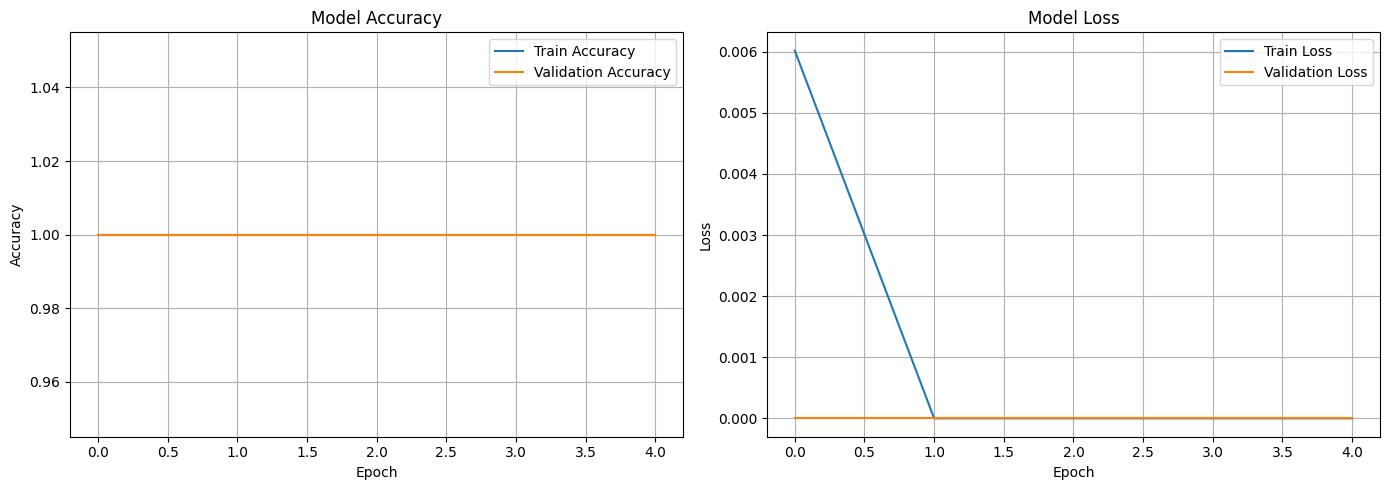

In [28]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    plt.figure(figsize=(14, 5))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)
